In [37]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pylab
import random
from random import shuffle, randint
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from cv2 import resize, INTER_NEAREST, INTER_CUBIC

# COCO dataset API
from pycocotools.coco import COCO

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# interactive mode
plt.ion()   

# set seed
torch.manual_seed(1)

# define data set location
dataDir='/home/jeff/Documents/data_sets/coco' # modify this path appropriatly to your downloaded coco dataset
dataType=['train2017','val2017']
train_annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType[0])
test_annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType[1])

# initialize COCO api for instance annotations
coco_train=COCO(train_annFile)
coco_test=COCO(test_annFile)

loading annotations into memory...
Done (t=17.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


['bird']
[16]
[0 1]


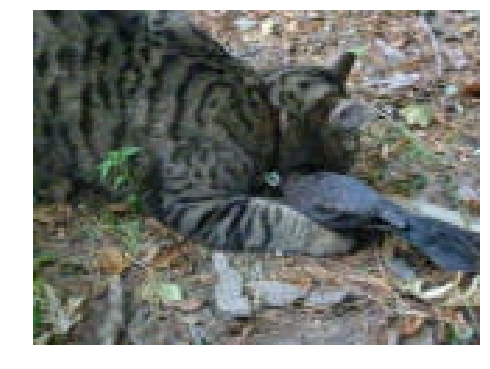

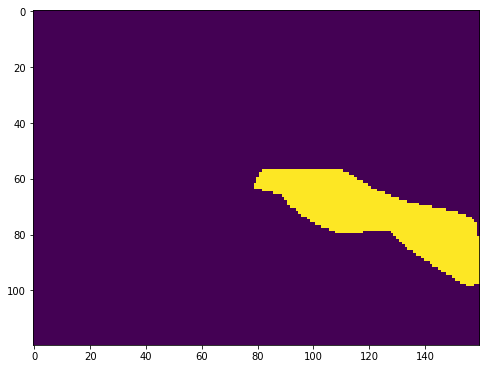

[ 0. 16.]


In [38]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType[0],img['file_name']))
# use url to load image
img = coco_train.loadImgs([407782])[0]
I = Image.open(os.path.join(dataDir, 'images', dataType[0], img['file_name']))

img = np.array(I)
plt.imshow(I); plt.axis('off')

# load and display instance annotations
categories = ['bird']
print categories
gt = np.zeros((img.shape[0],img.shape[1]))

catIds = coco_train.getCatIds(catNms=categories);
print catIds
annIds = coco_train.getAnnIds(imgIds=[407782], catIds=catIds, iscrowd=False)

anns = coco_train.loadAnns(annIds)

for ann in anns:
    mask = coco_train.annToMask(ann)
    print np.unique(mask)
    gt[mask == 1] = ann['category_id']

plt.imshow(I)
plt.show()
plt.imshow(gt)
plt.show()
print np.unique(gt)

# print np.asarray(I)

# 

In [65]:
def Random_Sized_Crop(img, mask, width=224, height=224, static = False):
    # define random crop transformation for image augmentation
    # Images in cv2 are defined as columns by rows [width x height]

    if static:
        seed(777)

    assert img.shape[0] == mask.shape[0]
    assert img.shape[1] == mask.shape[1]
    
    if img.shape[1] < width:
        print 'true 2'
        img = resize(img, (width, img.shape[0]), interpolation = INTER_CUBIC)
        mask = resize(mask, (width, mask.shape[0]), interpolation = INTER_NEAREST)   
    
    if img.shape[0] < height:
        print 'true 1'
        img = resize(img, (img.shape[1], height), interpolation = INTER_CUBIC)
        mask = resize(mask, (mask.shape[1], height), interpolation = INTER_NEAREST)        

    x = randint(0, img.shape[1] - width)
    y = randint(0, img.shape[0] - height)

    img = img[y:y+height, x:x+width]
    mask = mask[y:y+height, x:x+width]

    return img, mask

120
160
true 2
true 1
224
224
224
224


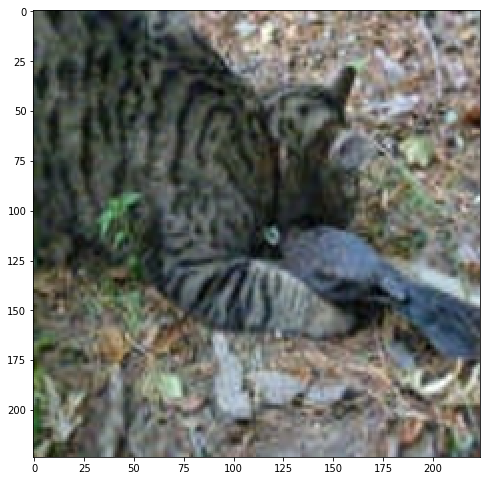

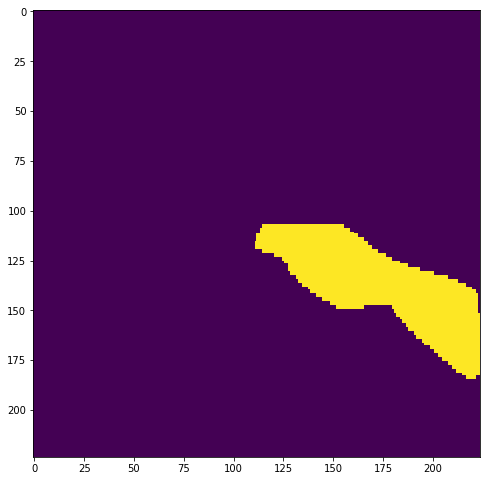

In [66]:
I = np.asarray(I)
gt = np.asarray(gt)

img, mask = Random_Sized_Crop(I, gt, width=224, height=224, static = False)

plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()

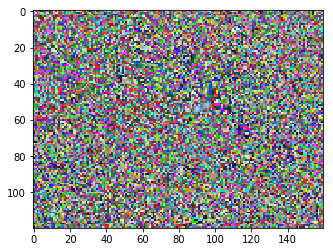

[  0   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  50  51  53  54  55  57  58  59  60
  61  63  64  65  66  67  68  69  70  71  73  74  75  76  77  78  79  80
  81  83  84  85  86  87  88  89  90  91  93  94  95  96  97  98  99 100
 101 102 104 105 107 108 109 110 111 112 114 115 116 117 118 119 120 121
 122 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139 140 141
 142 144 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161
 162 163 165 166 167 168 169 170 171 172 173 175 176 177 178 179 180 181
 182 183 185 186 187 188 189 190 191 192 193 195 196 197 198 199 201 202
 203 204 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222
 223 224 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241 242
 243 244 246 247 248 249 250 252 253 254 255]


In [26]:
data_transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [i/255. for i in [125, 125, 125]], std = [i/255. for i in [25, 25, 25]])
                                    ])

tensor_to_PIL = transforms.ToPILImage(mode=None)

I = data_transform(I)
I = I.cpu()
I = tensor_to_PIL(I)

plt.imshow(I)
plt.show()

print np.unique(I)